In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.util import random_noise
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
# from scipy.signal import correlate2d
from scipy.ndimage import correlate, convolve
from scipy.io import loadmat
from skimage.feature import match_template
from matplotlib.patches import Rectangle
# ONly if you have jupyter themes
from jupyterthemes import jtplot
jtplot.style()

### Colour boundary

In [5]:
flag2 = (imread('images/Mexican_flag.png'))[...,:3]
def imshow_color(image, size=(8,8)):
    plt.figure(figsize=(size))
    plt.imshow(image), plt.axis('off')
    plt.show()

In [3]:
flag=flag2[10:-10,25:-25]

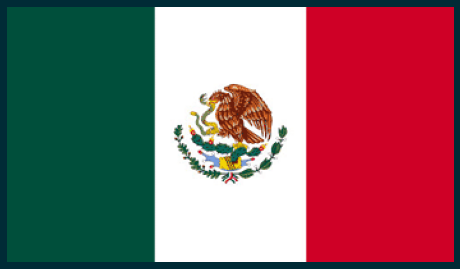

In [4]:
imshow_color(flag)

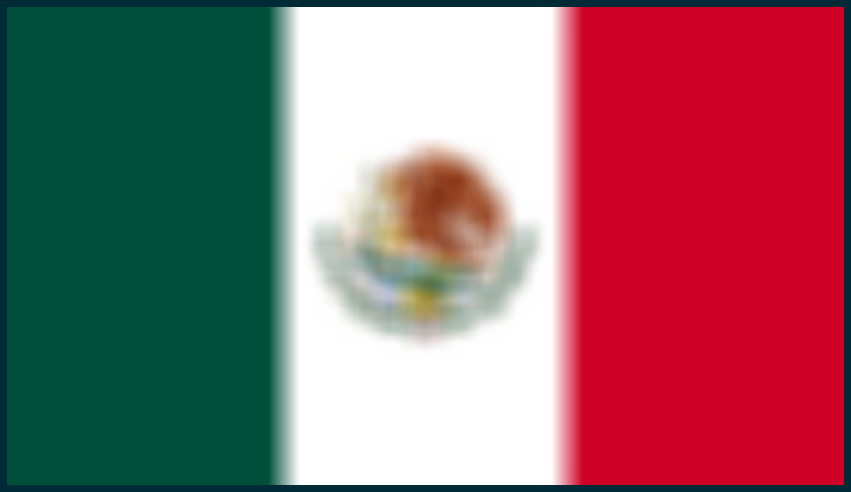

In [6]:
# apply uniform filter to see the effect from boundaries
filtered_flag = uniform_filter(flag, size=(13, 13, 1))
imshow_color(filtered_flag, (15,15))

In [7]:
# apply uniform filter to see the effect from boundaries
filtered_flag = gaussian_filter(flag, 13)
# imshow_color(filtered_flag, (15,15))

In [35]:
# check that input and output shapes are the same
filtered_flag.shape

(200, 350, 3)

In [36]:
flag.shape

(200, 350, 3)

In [26]:
#create manual filter
box_filter = 1/121*np.ones((11,11, 1))

In [58]:
f2 = correlate(flag, box_filter, mode='constant')

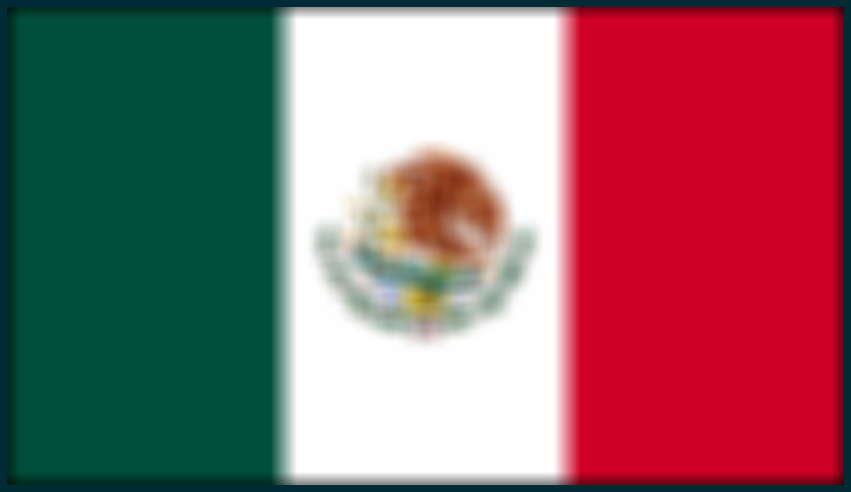

In [60]:
imshow_color(f2, (15,15))

In [59]:
def gaussian_filter2(size=(3,3), sigma=1):
    rows, cols = (size[0]-1)/2, (size[1]-1)/2
    [r, c] = np.mgrid[-rows:rows+1, -cols:cols+1]
    squares = r**2 + c**2
    f = np.exp(-squares/(2*sigma**2))
    #add extra axis for color filter, not needed for grayscale
    return f[..., None]/f.sum()

In [57]:
gauss_filt = gaussian_filter2(size=(11,11,1), sigma=2)

In [58]:
f3 = correlate(flag, gauss_filt, mode='constant')

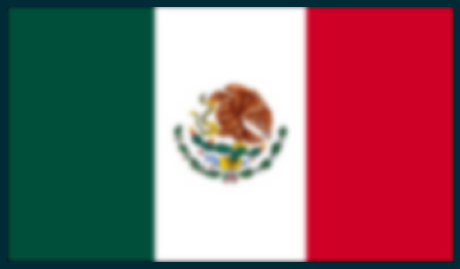

In [54]:
imshow_color(f3)

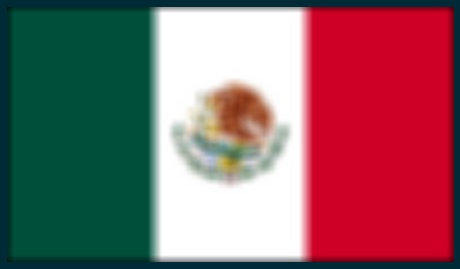

In [44]:
#convolution
f4 = convolve(flag, box_filter, mode='constant')
imshow_color(f4)

In [74]:
#trying with impulse
impulse = np.zeros((3,3,1))
impulse[1,1,:] = 1

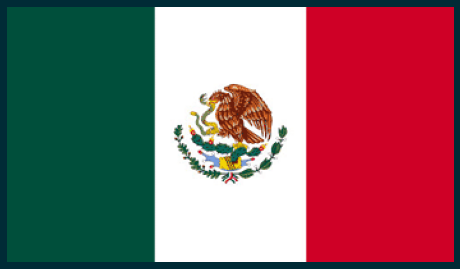

In [75]:
filt_impulse = correlate(flag, impulse)
imshow_color(filt_impulse)

### Corr vs Conv

In [72]:
impulse2 = np.zeros((11,11))
impulse2[5,5] = 1
aux_array = np.random.randint(0,100, (3,3))
print(aux_array)
print(impulse2)

[[39 99 94]
 [24 16 97]
 [72 30 13]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [76]:
f5=correlate(impulse2, aux_array,mode="constant")
print(f5)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 13. 30. 72.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 97. 16. 24.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 94. 99. 39.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [77]:
f6=convolve(impulse2, aux_array, mode='constant')
print(f6)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 39. 99. 94.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 24. 16. 97.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 72. 30. 13.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Matching pattern

In [3]:
pattern1 = loadmat('Scripts/waldoExample2.mat')

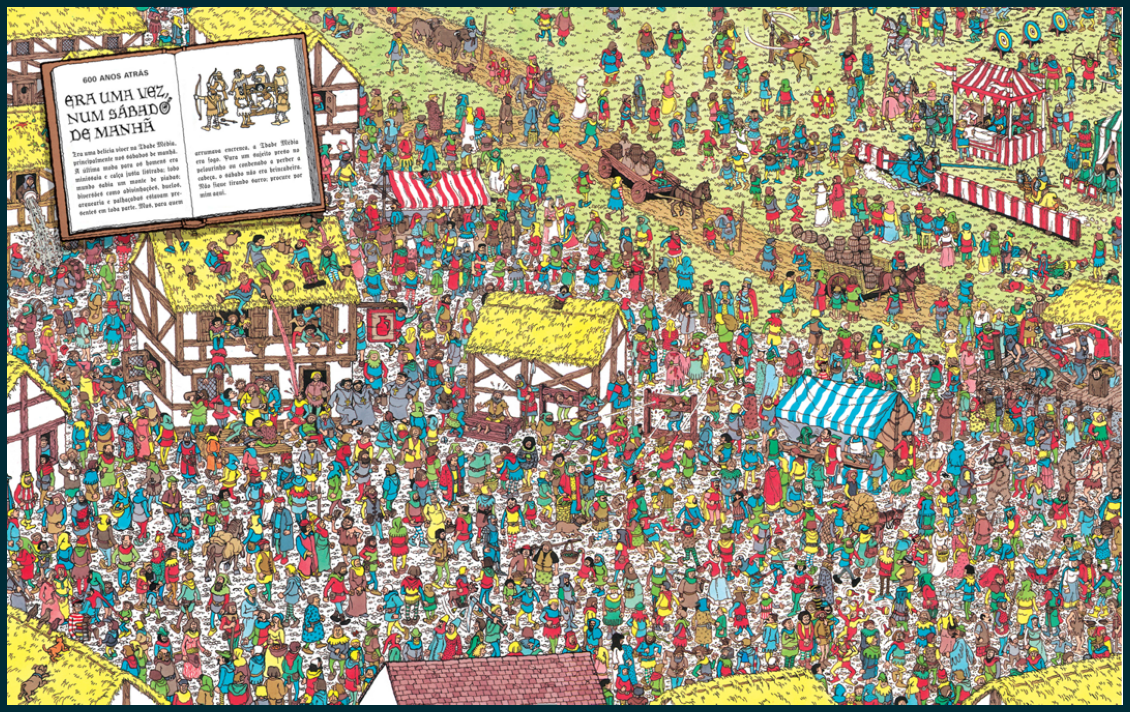

In [6]:
p1 = pattern1['waldo']
imshow_color(p1,(20,20))

In [7]:
p2 = pattern1['extract']

In [8]:
waldo = rgb2gray(p1)
patt = rgb2gray(p2)

In [9]:
def find_waldo(img, patt):
    aux = match_template(waldo, patt)
    r, c = np.argmax(np.max(aux, 1)), np.argmax(np.max(aux, 0))
    f1, ax1 = plt.subplots(figsize=(20,20))
    ax1.imshow(img, cmap=plt.cm.gray)
    rect=Rectangle((c,r), 18, 43,linewidth=4, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)
    plt.show()


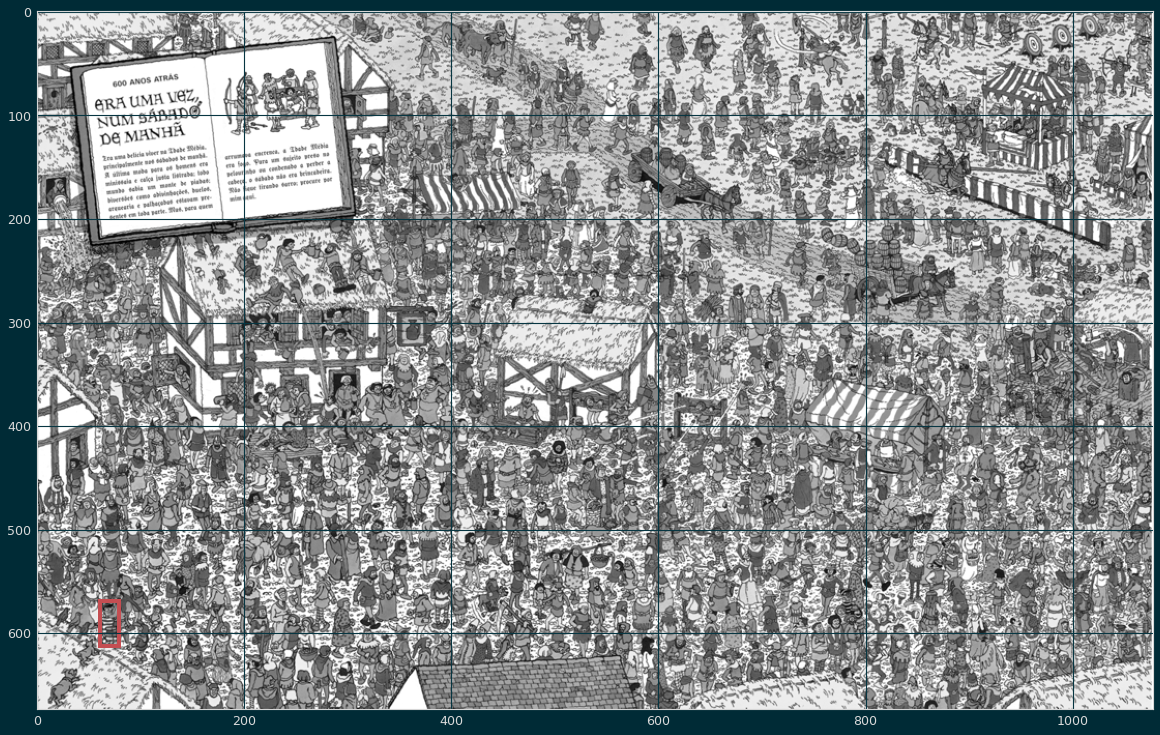

In [10]:
find_waldo(waldo,patt)